<h1 style="text-align:center">Undamped Two-mass-spring System<br>Eigenvalue Problem &amp; Free Vibration</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/TwoMass_3spring.png" alt="A Two-Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Two-Mass-Spring System</strong>
</p>

This notebook demonstrates the free-vibration response and the eigenvalue/eigenvector problem using a two-mass-spring system shown in Figure 1. We'll just look at one example set of parameters. The same techniques apply for other parameters and for larger matrices. 

The equations of motion for the system are:

$ \quad m_1 \ddot{x}_1 + (k_1+k_2)x_1 - k_2 x_2 = 0 $

$ \quad m_2 \ddot{x}_2 - k_2 x_1 + (k_2 + k_3)x_2 = 0 $

We could also write these equations in matrix form:

$ \quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} +  \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$

Define

$ \quad M = \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix} $

and 

$ \quad K = \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix} $

For information on how to obtain these equations, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the [Scipy version of the linear algebra module](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.linalg.eigh.html). It allows us to solve the "general" eignevalue problem.

In [1]:
# We'll use the scipy version of the linear algebra
from scipy import linalg


import numpy as np                        # Grab all of the NumPy functions with nickname np

from scipy.integrate import odeint        # We also need to import odeint for the simluations
from scipy import linalg                  # We'll use linalg for the eigenvalue problems

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

import matplotlib.pyplot as plt

In [3]:
# Define the system as a series of 1st order ODEs (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k1, k2, k3]
    """
    x1, x1_dot, x2, x2_dot = w
    m1, m2, k1, k2, k3 = p

    # Create sysODE = (x1', x1_dot', x2', x2_dot'):
    sysODE = [x1_dot,
             (-(k1 + k2) * x1 + k2 * x2) / m1,
             x2_dot,
             (k2 * x1 - (k2 + k3) * x2) / m2]
              
    return sysODE

In [4]:
# Define the system parameters
m1 = 1.0                # kg
m2 = 1.0                # kg
k1 = (2 * np.pi)**2     # N/m - chosen to make the low mode natural frequency =1Hz
k2 = (2 * np.pi)**2     # N/m - chosen to make the low mode natural frequency =1Hz
k3 = (2 * np.pi)**2     # N/m - chosen to make the low mode natural frequency =1Hz

## The Eigenvalue Problem
For the undamped proble we can use $M$ and $K$ directly to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = 0 $ 

for $\bar{X}$.

In [5]:
# Define the matrices
M = np.asarray([[m1, 0],
                [0,  m2]])

K = np.asarray([[k1 + k2, -k2],
                [-k2,      k2 + k3]])

In [6]:
eigenvals, eigenvects = linalg.eigh(K, M)


The linalg.eigh function returns two arrays, one of the eigenvalues and one of the eigenvectors. The eigenvalues are the square of the two natural frequencies. The eigenvectors are returned in normalized form, with each ''row'' of the array representing an eigenvector.


In [7]:
print('\n')
print('The resulting eigenalues are {:.2f} and {:.2f}.'.format(eigenvals[0], eigenvals[1]))
print('\n')
print('So the two natrual frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1])))
print('\n')



The resulting eigenalues are 39.48 and 118.44.


So the two natrual frequencies are 6.28rad/s and 10.88rad/s.




In [8]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')



The first eigenvector is [-0.70710678 -0.70710678].


The second eigenvector is [-0.70710678  0.70710678].




In [9]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 5.0
numpoints = 5001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

First, let's try initial conditions that exactly match the low mode.

$ \quad x_1(0) = x_0$ and $ x_2(0) = x_0$

In [10]:
# Now, set up hte intial conditions and call the ODE solver

# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = 0.5                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

This response should only contain the first, low mode since the initial conditions exactly match its shape. Let's plot it to verify.

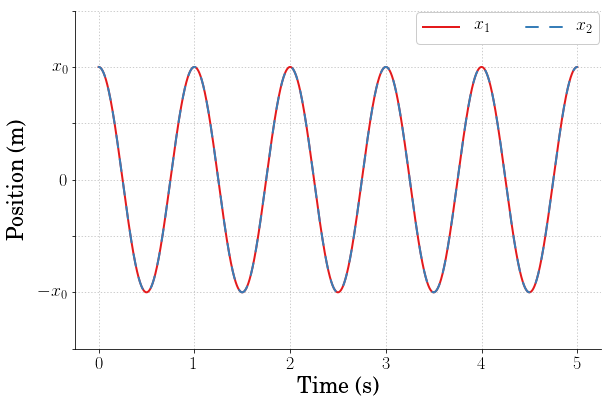

In [11]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-0.75,0.75)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75], ['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Midterm2_Prob1ci.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

Now, let's try initial conditions that exactly match the second mode.

$ \quad x_1(0) = x_0$ and $ x_2(0) = -x_0$

In [12]:
# Now, set up hte intial conditions and call the ODE solver

# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = -0.5                      # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

This response should only contain the second mode since the initial conditions exactly match its shape. Let's plot it to verify.

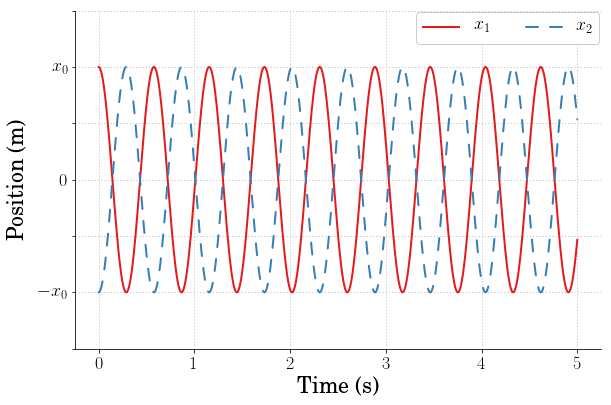

In [13]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-0.75,0.75)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75], ['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Midterm2_Prob1ci.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## The Undamped Eigenvalue Problem &mdash; State-Space Form
We'll now solve the undamped version of this problem using the state-space form. 

In [14]:
A = np.asarray([[0,           1,           0, 0],
                [-(k1+k2)/m1, 0,       k2/m1, 0],
                [0,           0,           0, 1],
                [k2/m2,       0, -(k2+k3)/m2, 0]])


eigenvals_ss, eigenvects_ss = linalg.eig(A)

In [15]:
print('\n')
print('The resulting eigenvalues are {:.4}, {:.4}, {:.4}, and {:.4}.'.format(eigenvals_ss[0], eigenvals_ss[1], eigenvals_ss[2], eigenvals_ss[3]))
print('\n')

print('So, the resulting natural frequencies are {:.4}rad/s and {:.4}rad/s.'.format(np.abs(eigenvals_ss[2]), np.abs(eigenvals_ss[0])))
print('\n')



The resulting eigenvalues are 10.88j, -10.88j, 6.283j, and -6.283j.


So, the resulting natural frequencies are 6.283rad/s and 10.88rad/s.




Now, let's format the resutling eigenvectors to allow easier comparison to the "normal" undamped solution

In [16]:
# make 1st entry real
eigvect1_ss = eigenvects_ss[:,0] * np.exp(-1.0j * np.angle(eigenvects_ss[0,0]))
eigvect2_ss = eigenvects_ss[:,2] * np.exp(-1.0j * np.angle(eigenvects_ss[0,2]))

# scale to match the undamped
eigvect1_ss *= (eigenvects[0,0] / eigvect1_ss[0])
eigvect2_ss *= (eigenvects[0,1] / eigvect2_ss[0])

In [17]:
print('\n')
print('The first eigevector is ')
print(np.array_str(eigvect1_ss, precision=4, suppress_small=True))
print('\n')
print('The second eigevector is ')
print(np.array_str(eigvect2_ss, precision=4, suppress_small=True))
print('\n')



The first eigevector is 
[-0.7071+0.j     -0.0000-7.6953j  0.7071-0.j      0.0000+7.6953j]


The second eigevector is 
[-0.7071+0.j      0.0000-4.4429j -0.7071+0.j     -0.0000-4.4429j]




We want to look at the entries in these vectors that correspond to the generalized coordinates $x_1$ and $x_2$. Given how we've defined our state-space formulation, the first and third states represent these. So, if we look at the first and third entries of the two eigenvectors, they should match the ones we found through the "normal" solution procedure earlier. 

## The Undamped Problem &mdash; Symmetric Form
Now, let's solve the undamped version of this problem using the symmetric form. This will show us how to approach the damped solution.

Using the matrices from the euqations of motion, we can define two new matrices, $A$ and $B$, by:

$ \quad A = \left[\begin{array}{cc}\hphantom{-}0 & -K \\-K & -C\end{array}\right] \ \ \ \ \ \ \ B = \left[\begin{array}{cc}-K & 0 \\ \hphantom{-}0 & M\end{array}\right]$

For the undamped case, $C=0$.

In [18]:
# Form the matrices
A = np.vstack((np.hstack((np.zeros((2,2)),-K)),np.hstack((-K, np.zeros((2,2))))))

B = np.vstack((np.hstack((-K, np.zeros((2,2)))),np.hstack((np.zeros((2,2)),M))))


# Solve the eigenvalue problem using them
eigenvals_sym, eigenvects_sym = linalg.eig(A, B)

In [19]:
print('\n')
print('The resulting eigenvalues are {:.4}, {:.4}, {:.4}, and {:.4}.'.format(eigenvals_sym[0], eigenvals_sym[1], eigenvals_sym[2], eigenvals_sym[3]))
print('\n')

print('So, the resulting natural frequencies are {:.4}rad/s and {:.4}rad/s.'.format(np.abs(eigenvals_sym[2]), np.abs(eigenvals_sym[0])))
print('\n')



The resulting eigenvalues are 10.88j, -10.88j, 6.283j, and -6.283j.


So, the resulting natural frequencies are 6.283rad/s and 10.88rad/s.




In [20]:
# make 1st entry real
eigvect1_sym = eigenvects_sym[:,0] * np.exp(-1.0j * np.angle(eigenvects_sym[0,0]))
eigvect2_sym = eigenvects_sym[:,2] * np.exp(-1.0j * np.angle(eigenvects_sym[0,2]))

# scale to match the undamped
eigvect1_sym *= (eigenvects[0,0] / eigvect1_sym[0])
eigvect2_sym *= (eigenvects[0,1] / eigvect2_sym[0])

In [21]:
print('\n')
print('The first eigevector is ')
print(np.array_str(eigvect1_sym, precision=4, suppress_small=True))
print('\n')
print('The second eigevector is ')
print(np.array_str(eigvect2_sym, precision=4, suppress_small=True))
print('\n')



The first eigevector is 
[-0.7071+0.j      0.7071+0.j      0.0000-7.6953j  0.0000+7.6953j]


The second eigevector is 
[-0.7071+0.j     -0.7071+0.j      0.0000-4.4429j -0.0000-4.4429j]




We again want to look at the entries in these vectors that correspond to the generalized coordinates $x_1$ and $x_2$. In the symmetric formulation, the first and second states represent these. So, if we look at the first and second entries of the two eigenvectors, they match the ones we found through the "normal" solution procedure earlier. 


<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [22]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))